# One Sided Selection
Machine Learning with Imbalanced Data - Course

First finds the hardest instances to classify correctly from the majority class. Then removes noisy observations with Tomek Links.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

from imblearn.under_sampling import OneSidedSelection

## Create data
We will create data where the classes have different degrees of separateness

In [2]:
def make_data(sep):
    # return arrays
    X, y = make_classification(n_samples=1000,
                               n_features=2,
                               n_redundant=0,
                               n_clusters_per_class=1,
                               weights=[0.99],
                               class_sep=sep,   # how separate the classes are
                               random_state=1,)
    
    # transform arrays into pandas df and series
    X = pd.DataFrame(X, columns=['varA', 'varB'])
    y = pd.Series(y)

    return X, y

0    983
1     17
Name: count, dtype: int64


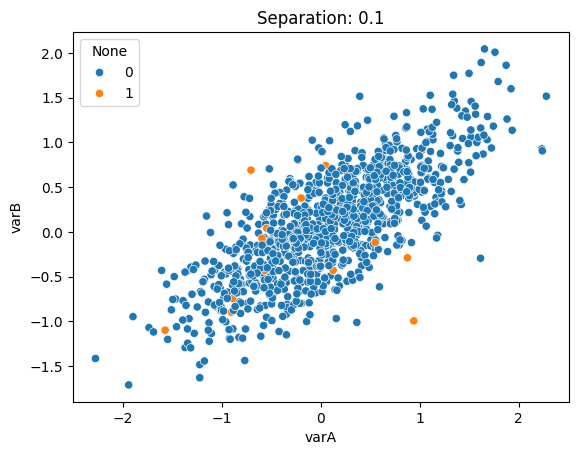

0    983
1     17
Name: count, dtype: int64


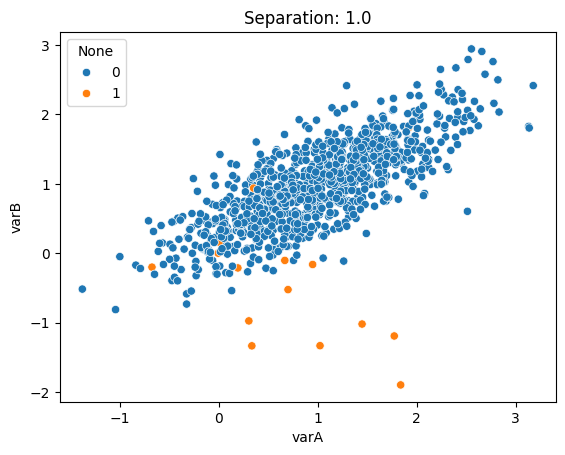

0    983
1     17
Name: count, dtype: int64


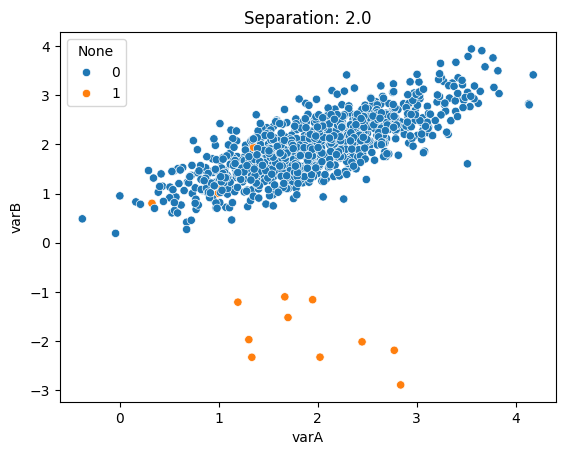

In [3]:
# make datasets with different class separateness
# and plot
for sep in [0.1, 1., 2.]:
    X, y = make_data(sep)
    print(y.value_counts())

    sns.scatterplot(data=X, x='varA', y='varB', hue=y)
    plt.title('Separation: {}'.format(sep))
    plt.show()

As we increase the parameter `sep`, the minority and majority class show less degree of overlap.

## Undersample with One Side selection

### Well separated classes

In [4]:
# create data
X, y = make_data(sep=2)

# set up OSS
oss = OneSidedSelection(
    sampling_strategy='auto',   # undersamples only the majority class
    random_state=0,
    n_neighbors=1,  # default
    n_jobs=-1
)

X_resampled, y_resampled = oss.fit_resample(X, y)

In [5]:
# size of original data
X.shape, y.shape

((1000, 2), (1000,))

In [6]:
# size of undersampled data
X_resampled.shape, y_resampled.shape

((730, 2), (730,))

Note that more observations have been removed compared to Tomek Links

In [7]:
# number of minority class observations
y.value_counts()

0    983
1     17
Name: count, dtype: int64

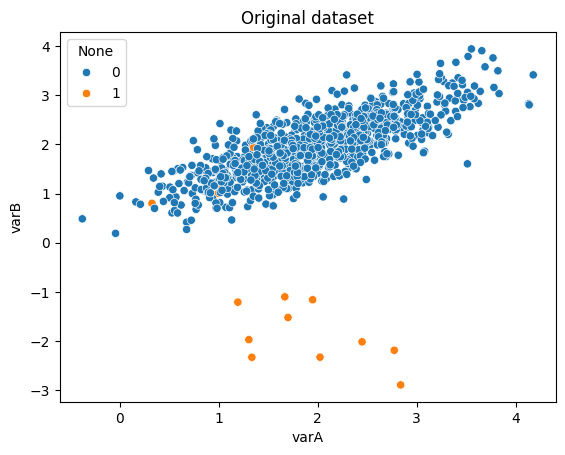

In [8]:
sns.scatterplot(data=X, x='varA', y='varB', hue=y)

plt.title('Original dataset')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

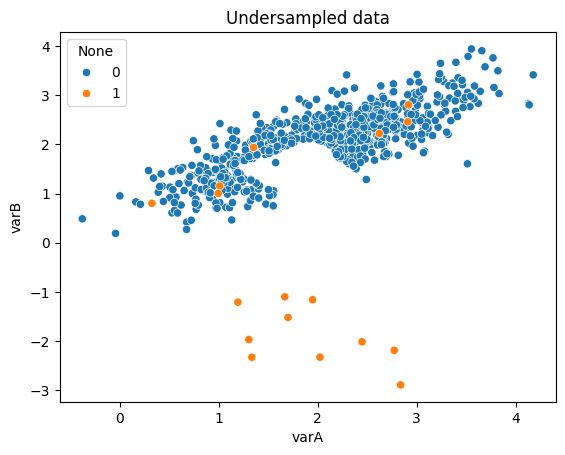

In [9]:
# plot undersampled data
sns.scatterplot(X_resampled, x='varA', y='varB', hue=y_resampled)

plt.title('Undersampled data')
plt.show

### Partially separated classes

In [10]:
# create data
X, y = make_data(sep=0.5)

# set up OSS
oss = OneSidedSelection(
    sampling_strategy='auto',   # undersamples only the majority class
    random_state=0,
    n_neighbors=1,  # default
    n_jobs=-1
)

X_resampled, y_resampled = oss.fit_resample(X, y)

In [11]:
# size of original data
X.shape, y.shape

((1000, 2), (1000,))

In [12]:
# size of undersampled data
X_resampled.shape, y_resampled.shape

((939, 2), (939,))

Note that more observations have been removed compared to Tomek Links

In [13]:
# number of minority class observations
y.value_counts()

0    983
1     17
Name: count, dtype: int64

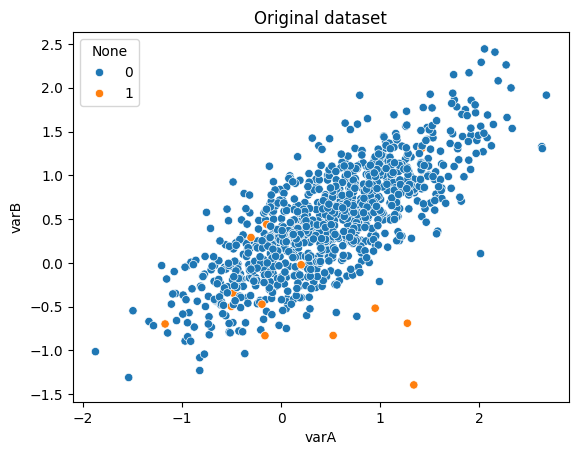

In [14]:
sns.scatterplot(data=X, x='varA', y='varB', hue=y)

plt.title('Original dataset')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

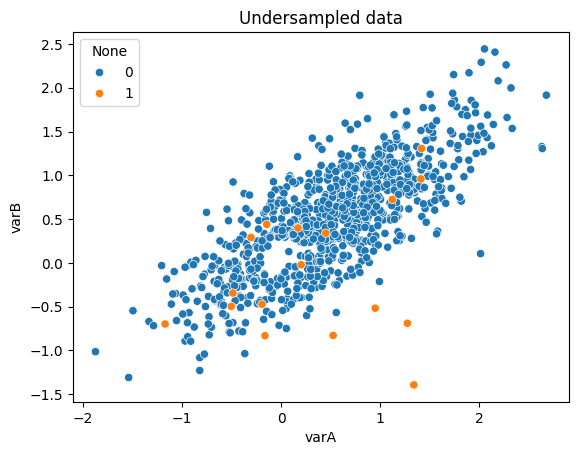

In [15]:
# plot undersampled data
sns.scatterplot(X_resampled, x='varA', y='varB', hue=y_resampled)

plt.title('Undersampled data')
plt.show

## One Sided selection
### Real data - Performance comparison
Does it work well with real datasets?

In [16]:
# Load data
data = pd.read_csv('../datasets/kdd2004.csv')

data.head()

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,target
0,52.0,32.69,0.30,2.5,20.0,1256.8,-0.89,0.33,11.0,-55.0,...,1595.1,-1.64,2.83,-2.0,-50.0,445.2,-0.35,0.26,0.76,-1
1,58.0,33.33,0.00,16.5,9.5,608.1,0.50,0.07,20.5,-52.5,...,762.9,0.29,0.82,-3.0,-35.0,140.3,1.16,0.39,0.73,-1
2,77.0,27.27,-0.91,6.0,58.5,1623.6,-1.40,0.02,-6.5,-48.0,...,1491.8,0.32,-1.29,0.0,-34.0,658.2,-0.76,0.26,0.24,-1
3,41.0,27.91,-0.35,3.0,46.0,1921.6,-1.36,-0.47,-32.0,-51.5,...,2047.7,-0.98,1.53,0.0,-49.0,554.2,-0.83,0.39,0.73,-1
4,50.0,28.00,-1.32,-9.0,12.0,464.8,0.88,0.19,8.0,-51.5,...,479.5,0.68,-0.59,2.0,-36.0,-6.9,2.02,0.14,-0.23,-1


In [17]:
# imbalanced target
data['target'].value_counts(normalize=True)

target
-1    0.991108
 1    0.008892
Name: proportion, dtype: float64

In [18]:
# separate dataset into train and test

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target'], axis=1),  # drop the target
    data['target'],  # just the target
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((102025, 74), (43726, 74))

In [31]:
# set up OSS
oss = OneSidedSelection(
    sampling_strategy='auto',
    random_state=0,
    n_neighbors=2,
    n_jobs=-1
)

X_resampled, y_resampled = oss.fit_resample(X_train, y_train)

In [32]:
# number of positive class in original dataset
y_train.value_counts()

target
-1    101134
 1       891
Name: count, dtype: int64

In [33]:
y_resampled.value_counts()

target
-1    100726
 1       891
Name: count, dtype: int64

## Plot data

Text(0.5, 1.0, 'Original data')

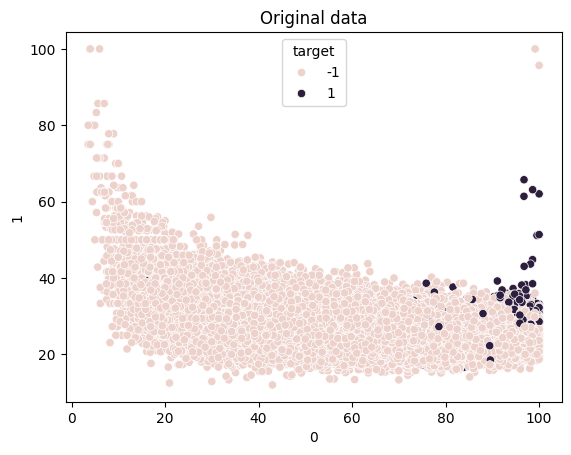

In [34]:
# original data

sns.scatterplot(data=X_train,
                x="0",
                y="1",
                hue=y_train)

plt.title('Original data')

Text(0.5, 1.0, 'Undersampled data')

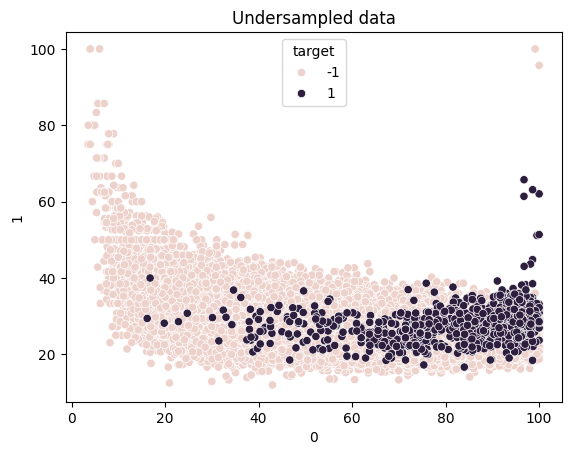

In [35]:
# undersampled data

sns.scatterplot(data=X_resampled,
                x="0",
                y="1",
                hue=y_resampled)

plt.title('Undersampled data')

Text(0.5, 1.0, 'Original data')

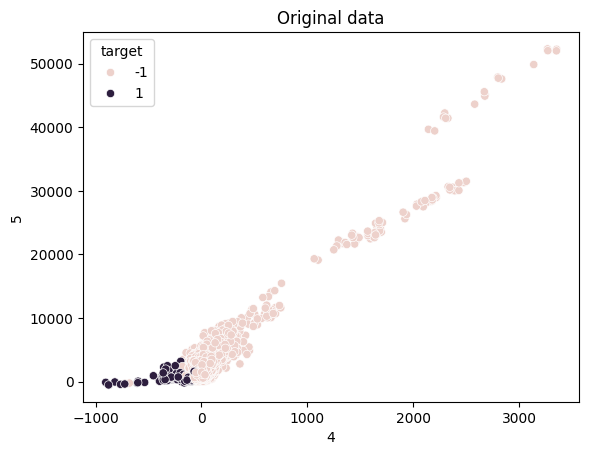

In [36]:
# original data

sns.scatterplot(data=X_train,
                x="4",
                y="5",
                hue=y_train)

plt.title('Original data')

Text(0.5, 1.0, 'Undersampled data')

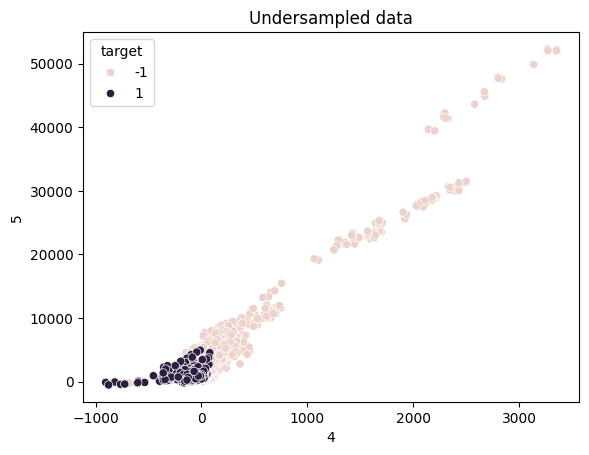

In [37]:
sns.scatterplot(data=X_resampled,
                x="4",
                y="5",
                hue=y_resampled)

plt.title('Undersampled data')

## Machine learning performance comparison

In [38]:
# function to train random forests and evaluate the performance
def run_randomForests(X_train, X_test, y_train, y_test):
    
    rf = RandomForestClassifier(n_estimators=200, random_state=39, max_depth=4)
    rf.fit(X_train, y_train)

    print('Train set')
    pred = rf.predict_proba(X_train)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    
    print('Test set')
    pred = rf.predict_proba(X_test)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

In [39]:
# evaluate performance of algorithm built
# using imbalanced dataset
run_randomForests(X_train, X_test, y_train, y_test)

Train set
Random Forests roc-auc: 0.9736769545142595
Test set
Random Forests roc-auc: 0.9724711107235364


In [40]:
# evaluate performance of algorithm built
# using undersampled dataset
run_randomForests(X_resampled, X_test, y_resampled, y_test)

Train set
Random Forests roc-auc: 0.9763612525478049
Test set
Random Forests roc-auc: 0.9746986108011939


One Sided Selection did not seem to improve performance